In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpmath import *

In [3]:
mp.dps = 100; mp.pretty = True

In [4]:
import numpy as np

## Neutrino oscillation and lepton data

In [5]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [6]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

In [7]:
from Unu_seesaw import diagonalizationMnu,Mnu
# No degenerado
diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mp.mpf('3.0'),m6/mp.mpf('2.0'),m6)

Mnu1 = lambda m1,m6: Mnu(m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

# Degenerado
# diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
#     m1,m2,m3,m6,m6,m6)

# Mnu1 = lambda m1,m6: Mnu(m1,m2,m3,m6,m6,m6)


# diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
#     m1,m2,m3,m6,m6,m6)

In [8]:
n = 200
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

m = mpf('1e-1')
M,UL,UR = diagonalizationMnu1(m1,m)
mp.nprint(mp.chop(M))

[1.0e-12, 8.65448e-12, 5.02394e-11, 0.0333333, 0.05, 0.1]


In [9]:
#m = mpf('1e15')
# for m in m6np:
#     M,UL,UR = diagonalizationMnu1(m1,m)
#     #nprint(chop(UL*Mnu1(m1,m)*UR))
#     # print('UL = \n')
#     # nprint(chop(UL))
#     # print('UR = \n')
#     # nprint(chop(UR))
#     nprint(chop(UL*UR))


In [10]:
from OneLoopLFVHD.LFVHDFeynG_mpmath2 import C0, C1, C2, B12_0 , B1_0, B1_1, B2_0, B2_1, B12_0

In [11]:
from OneLoopLFVHD.data import ml
mh = mpf('125.1')
mW = mpf('80.379')
g = (2*mpf('80.379'))/mpf('246')
fac = g**3/(64*mp.pi**2*mW**2)

In [12]:

C0_UU23_l = []
C1_UU23_l = []
C2_UU23_l = []
B1_0_UU23_l = []
B1_1_UU23_l = []
B2_0_UU23_l = []
B2_1_UU23_l = []
s = 0
for m in m6np:
    C0_UU23 = 0
    C1_UU23 = 0
    C2_UU23 = 0
    B1_0_UU23 = 0
    B1_1_UU23 = 0
    B2_0_UU23 = 0
    B2_1_UU23 = 0
    a=2;b=3
    mn_,Unu,Unu_dagger = diagonalizationMnu1(m1,m)
    for k in range(1,7):
        
        UU = Unu[b-1,k-1]*Unu_dagger[k-1,a-1]
        C0_UU23 +=  C0(mh, mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        C1_UU23 +=  C1(mh,ml[2], mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        C2_UU23 +=  C2(mh,ml[3], mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        B1_0_UU23 += B1_0(ml[2], mn_[k-1], mW)*UU*mn_[k-1]**s
        B1_1_UU23 += B1_1(ml[2], mn_[k-1], mW)*UU*mn_[k-1]**s
        B2_0_UU23 += B2_0(ml[3], mn_[k-1], mW)*UU*mn_[k-1]**s
        B2_1_UU23 += B2_1(ml[3], mn_[k-1], mW)*UU*mn_[k-1]**s

    C0_UU23_l.append(C0_UU23)
    C1_UU23_l.append(C1_UU23)
    C2_UU23_l.append(C2_UU23)
    B1_0_UU23_l.append(B1_0_UU23)
    B1_1_UU23_l.append(B1_1_UU23)
    B2_0_UU23_l.append(B2_0_UU23)
    B2_1_UU23_l.append(B2_1_UU23)

C0_UU23np = np.array(C0_UU23_l)
C1_UU23np = np.array(C1_UU23_l)
C2_UU23np = np.array(C2_UU23_l)
B1_0_UU23np = np.array(B1_0_UU23_l)
B1_1_UU23np = np.array(B1_1_UU23_l)
B2_0_UU23np = np.array(B2_0_UU23_l)
B2_1_UU23np = np.array(B2_1_UU23_l)

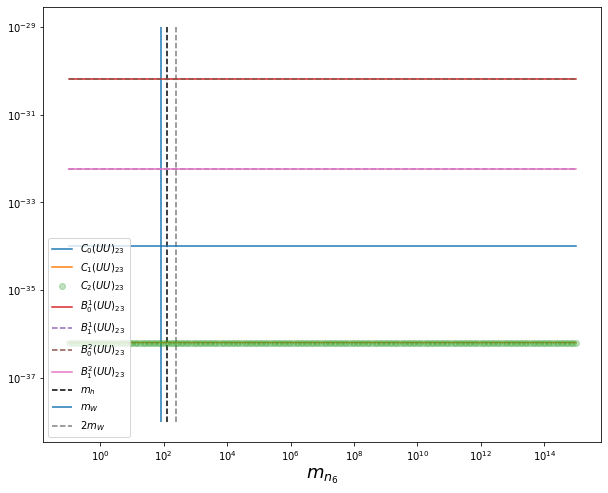

In [13]:
plt.figure(figsize=(10,8))
plt.loglog(np.real(m6np),abs(C0_UU23np*fac),label='$C_0 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(C1_UU23np*fac),'-',label='$C_1 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(C2_UU23np*fac),'o',label='$C_2 (UU)_{23}$',alpha=0.3)
plt.loglog(np.real(m6np),abs(B1_0_UU23np*fac),label='$B^1_0 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B1_1_UU23np*fac),'--',label='$B^1_1 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B2_0_UU23np*fac),'--',label='$B^2_0 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B2_1_UU23np*fac),label='$B^2_1 (UU)_{23}$')
plt.vlines(125.1,1e-38,1e-29,label='$m_h$',colors='black',linestyles='--')
plt.vlines(80.379,1e-38,1e-29,label='$m_W$')
plt.vlines(125.1*2,1e-38,1e-29,label='$2 m_W $',colors='gray',linestyles='--')
#plt.vlines(80.379**2,1e-38,1e-23,label='$m_W^2$',colors='gray',linestyles='--')
#plt.tick_params(length=6, width=2)
plt.xlabel('$m_{n_6}$',fontsize=18)
#plt.xlim(1e-1,1e15)
#plt.ylim(1e-38,1e-23)
plt.legend()

$A_L^{(8)}(n_i G)  =  \frac{{m}_{a} {m}_{b}^2 }{{m}_{a}^{2} - {m}_{b}^{2}}\sum_{i=1}^{K+3}  \left(- \left({m}_{a}^{2} + m_{n_i}^{2}\right) \operatorname{{{B^{(1)}_{1}}}} + 2 \operatorname{{{B^{(1)}_{0}}}} m_{n_i}^{2}\right) \Delta_{ii}^{ab}$

$A_L^{(10)}(G n_i)  = - \frac{ {m}_{a}}{{m}_{a}^{2} - {m}_{b}^{2}}\sum_{i=1}^{K+3} \left(\left({m}_{a}^{2} + {m}_{b}^{2}\right) \operatorname{{{B^{(2)}_{0}}}} m_{n_i}^{2} + \left({m}_{a}^{2} + m_{n_i}^{2}\right) \operatorname{{{B^{(2)}_{1}}}} {m}_{b}^{2}\right) \Delta_{ii}^{ab}$

In [14]:
# mh = mpf('125.1')
# mW = mpf('80.379')
# C0_UU23_l = []
# C1_UU23_l = []
# C2_UU23_l = []
B1_0_UU23_l = []
B1_1_UU23_l = []
B2_0_UU23_l = []
B2_1_UU23_l = []
s = 0
a=2;b=3
for m in m6np:
#     C0_UU23 = 0
#     C1_UU23 = 0
#     C2_UU23 = 0
    B1_0_UU23 = 0
    B1_1_UU23 = 0
    B2_0_UU23 = 0
    B2_1_UU23 = 0
    mn_,Unu,Unu_dagger = diagonalizationMnu1(m1,m)
    for k in range(1,7):
        
        UU = Unu[b-1,k-1]*Unu_dagger[k-1,a-1]
        mnk = mn_[k-1]
        mnk2 = mn_[k-1]**s

        # C0_UU23 +=  C0(mh, mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        # C1_UU23 +=  C1(mh,ml[2], mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        # C2_UU23 +=  C2(mh,ml[3], mn_[k-1], mW,mW)*UU*mn_[k-1]**s
        B1_0_UU23 += B1_0(ml[a], mnk, mW)*UU*mnk2
        B1_1_UU23 += B1_1(ml[a], mnk, mW)*UU*mnk2
        B2_0_UU23 += B2_0(ml[b], mnk, mW)*UU*mnk2
        B2_1_UU23 += B2_1(ml[b], mnk, mW)*UU*mnk2

    # C0_UU23_l.append(C0_UU23)
    # C1_UU23_l.append(C1_UU23)
    # C2_UU23_l.append(C2_UU23)
    B1_0_UU23_l.append(B1_0_UU23)
    B1_1_UU23_l.append(B1_1_UU23)
    B2_0_UU23_l.append(B2_0_UU23)
    B2_1_UU23_l.append(B2_1_UU23)


In [15]:

# C0_UU23np = np.array(C0_UU23_l)
# C1_UU23np = np.array(C1_UU23_l)
# C2_UU23np = np.array(C2_UU23_l)
B1_0_UU23np = ((ml[a]*ml[b]**2)/(ml[a]**2 - ml[b]**2))*2*np.array(B1_0_UU23_l)
B1_1_UU23np = ((ml[a]*ml[b]**2)/(ml[a]**2 - ml[b]**2))*np.array(B1_1_UU23_l)
B2_0_UU23np = -((ml[a]*(ml[a]**2 + ml[b]**2))/(ml[a]**2 - ml[b]**2))*np.array(B2_0_UU23_l)
B2_1_UU23np = -((ml[a]*(ml[b]**2))/(ml[a]**2 - ml[b]**2))*np.array(B2_1_UU23_l)

AL8 = B1_0_UU23np - B1_1_UU23np
AL10 = B2_0_UU23np + B2_1_UU23np


$A_L^{(8)}(n_i G)  =  \frac{{m}_{a} {m}_{b}^2 }{{m}_{a}^{2} - {m}_{b}^{2}}\sum_{i=1}^{K+3}  \left(- \left({m}_{a}^{2} + m_{n_i}^{2}\right) \operatorname{{{B^{(1)}_{1}}}} + 2 \operatorname{{{B^{(1)}_{0}}}} m_{n_i}^{2}\right) \Delta_{ii}^{ab}$

$A_L^{(10)}(G n_i)  = - \frac{ {m}_{a}}{{m}_{a}^{2} - {m}_{b}^{2}}\sum_{i=1}^{K+3} \left(\left({m}_{a}^{2} + {m}_{b}^{2}\right) \operatorname{{{B^{(2)}_{0}}}} m_{n_i}^{2} + \left({m}_{a}^{2} + m_{n_i}^{2}\right) \operatorname{{{B^{(2)}_{1}}}} {m}_{b}^{2}\right) \Delta_{ii}^{ab}$

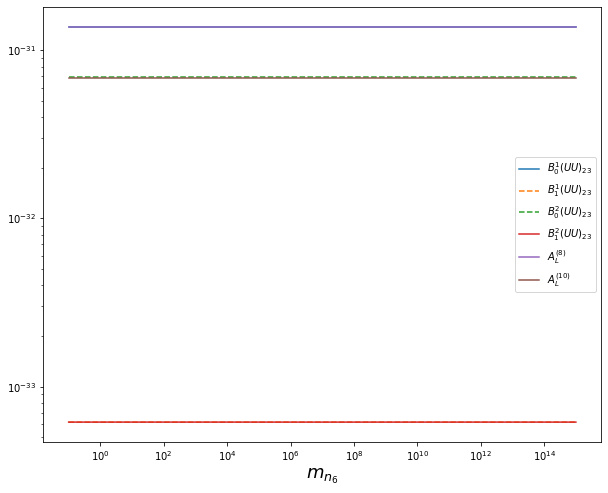

In [16]:
plt.figure(figsize=(10,8))
plt.loglog(np.real(m6np),abs(B1_0_UU23np*fac),label='$B^1_0 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B1_1_UU23np*fac),'--',label='$B^1_1 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B2_0_UU23np*fac),'--',label='$B^2_0 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B2_1_UU23np*fac),label='$B^2_1 (UU)_{23}$')

plt.loglog(np.real(m6np),abs(AL8*fac),label='$A_L^{(8)}$')
plt.loglog(np.real(m6np),abs(AL10*fac),label='$A_L^{(10)}$')

#plt.vlines(125.1,1e-38,1e-23,label='$m_h$',colors='black',linestyles='--')

#plt.tick_params(length=6, width=2)
plt.xlabel('$m_{n_6}$',fontsize=18)
#plt.xlim(1e-1,1e15)
#plt.ylim(1e-38,1e-23)
plt.legend()

# PV function summation from Two fermion diagrams

In [55]:
C0_UU23_mnl2_l = []
C0_UU23_l = []

C1_UU23_Akl_l = []
C1_UU23_akl_l = []
UUCkl_l = []
UUCklc_l = []

B12_0_UU23_mnl2_l = []
B12_0_UU23_l = []

ml2 = ml[2]
ml3 = ml[3]
for m in m6np:
    C0_UU23_mnl2 = 0
    C0_UU23 = 0

    C1_UU23_Akl = 0
    C1_UU23_akl = 0

    B12_0_UU23_mnl2 = 0
    B12_0_UU23 = 0

    a=2;b=3
    s=2
    mn_,Unu,Unu_dagger = diagonalizationMnu1(m1,m)
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])
    for k in range(1,7):
        for l in range(1,7):
            #if (k in [4,5,6] and l in [4,5,6]) or (l in [4,5,6] and k in [4,5,6]):
            mnk = mn_[k-1]
            mnl = mn_[l-1]
            mnk2 = mn_[k-1]**s
            mnl2 = mn_[l-1]**s
            Ckl = Cij(k-1,l-1)
            Cklc = conj(Ckl)
            UU = Unu[b-1,k-1]*Unu_dagger[l-1,a-1]
            UUCkl = UU*Ckl 
            UUCklc = UU*Cklc
            C0_ = C0(mh, mW,mnk,mnl)
            C1_ = C1(mh,ml2,mW,mnk,mnl)
            B12_0_ = B12_0(mh, mnk, mnl)

            C0_UU23_mnl2 +=  C0_*UU*mnl2*Ckl
            C0_UU23 +=  C0_*mnk*mnl*UU*Cklc


            Akl = (ml2**2*mnl2 + ml3**2*mnk2 - 2*mnk2*mnl2)
            akl = (ml2**2 + ml3**2 - mnk2 - mnl2)
            C1_UU23_Akl +=  C1_*UU*Akl*Ckl
            C1_UU23_akl +=  C1_*mnk*mnl*UU*akl*Cklc

            B12_0_UU23_mnl2 += B12_0_*UU*mnl2*Ckl
            B12_0_UU23 += B12_0_*mnk*mnl*UU*Cklc


    C0_UU23_mnl2_l.append(C0_UU23_mnl2)
    C0_UU23_l.append(C0_UU23)

    C1_UU23_Akl_l.append(C1_UU23_Akl)
    C1_UU23_akl_l.append(C1_UU23_akl)

    B12_0_UU23_mnl2_l.append(B12_0_UU23_mnl2)
    B12_0_UU23_l.append(B12_0_UU23)
    UUCkl_l.append(UUCkl)
    UUCklc_l.append(UUCklc)



In [56]:

C0_UU23_mnl2np = np.array(C0_UU23_mnl2_l)
C0_UU23np = np.array(C0_UU23_l)

C1_UU23_Aklnp = np.array(C1_UU23_Akl_l)
C1_UU23_aklnp = np.array(C1_UU23_akl_l)

#C2_UU23np = np.array(C2_UU23_l)
B12_0_UU23_mnl2np = np.array(B12_0_UU23_mnl2_l)
B12_0_UU23np = np.array(B12_0_UU23_l)

UUCklnp = np.array(UUCkl_l)
UUCklcnp = np.array(UUCklc_l)



TermAL_mnl2np = ml[a]*B12_0_UU23_mnl2np + mW**2*C0_UU23_mnl2np -C1_UU23_Aklnp
TermAL_mnkmnlnp = ml[a]*B12_0_UU23np + mW**2*C0_UU23np - C1_UU23_aklnp


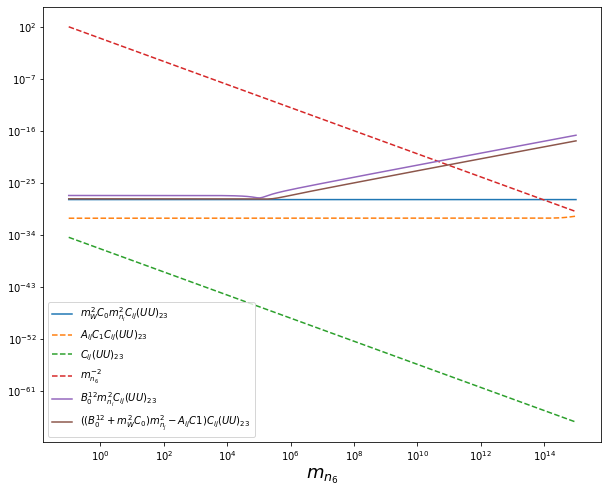

In [57]:
plt.figure(figsize=(10,8))
###############3
plt.loglog(np.real(m6np),mW**2*abs(C0_UU23_mnl2np*fac),label='$m_W^2 C_0 m_{n_i}^2 C_{ij} (UU)_{23}$')
plt.loglog(np.real(m6np),abs(C1_UU23_Aklnp*fac),'--',label='$A_{ij} C_1 C_{ij} (UU)_{23}$')
#####
plt.loglog(np.real(m6np),abs(UUCklcnp),'--',label='$C_{ij} (UU)_{23}$')
plt.loglog(np.real(m6np),abs(1.0/m6np**2),'--',label='$m_{n_6}^{-2}$')
######
#plt.loglog(np.real(m6np),abs(C2_UU23np*fac),label='$C_2 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B12_0_UU23_mnl2np*fac),label='$B^{12}_0 m_{n_i}^2 C_{ij}  (UU)_{23}$')
plt.loglog(np.real(m6np),abs(TermAL_mnl2np*fac),
label='$((B^{12}_0 + m_W^2 C_0)m_{n_j}^2 - A_{ij} C1 )C_{ij}(UU)_{23}$')

plt.xlabel('$m_{n_6}$',fontsize=18)
plt.legend()


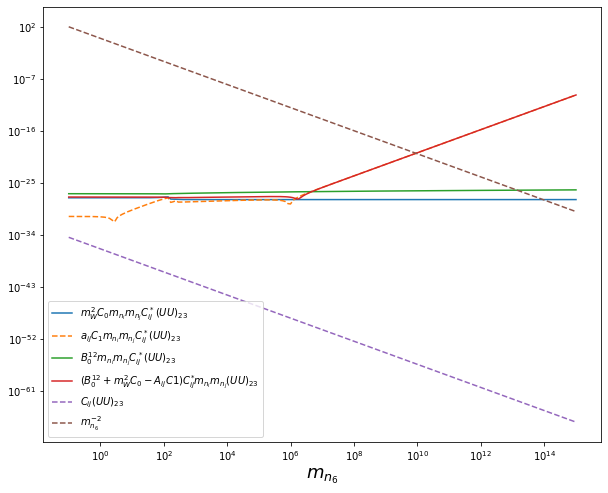

In [58]:
plt.figure(figsize=(10,8))
##################
plt.loglog(np.real(m6np),mW**2*abs(C0_UU23np*fac),label='$m_W^2 C_0 m_{n_i} m_{n_j} C^*_{ij} (UU)_{23}$')
plt.loglog(np.real(m6np),abs(C1_UU23_aklnp*fac),'--',label='$a_{ij} C_1 m_{n_i} m_{n_j} C^*_{ij} (UU)_{23}$')
#plt.loglog(np.real(m6np),abs(C2_UU23np*fac),label='$C_2 (UU)_{23}$')
plt.loglog(np.real(m6np),abs(B12_0_UU23np*fac),label='$B^{12}_0 m_{n_i} m_{n_j}C^*_{ij}  (UU)_{23}$')
plt.loglog(np.real(m6np),abs(TermAL_mnkmnlnp*fac),
label='$(B^{12}_0 + m_W^2 C_0 - A_{ij} C1 )C^{*}_{ij}m_{n_i} m_{n_j}(UU)_{23}$')
#####
plt.loglog(np.real(m6np),abs(UUCklcnp),'--',label='$C_{ij} (UU)_{23}$')
plt.loglog(np.real(m6np),abs(1.0/m6np**2),'--',label='$m_{n_6}^{-2}$')
######

plt.xlabel('$m_{n_6}$',fontsize=18)

plt.legend()

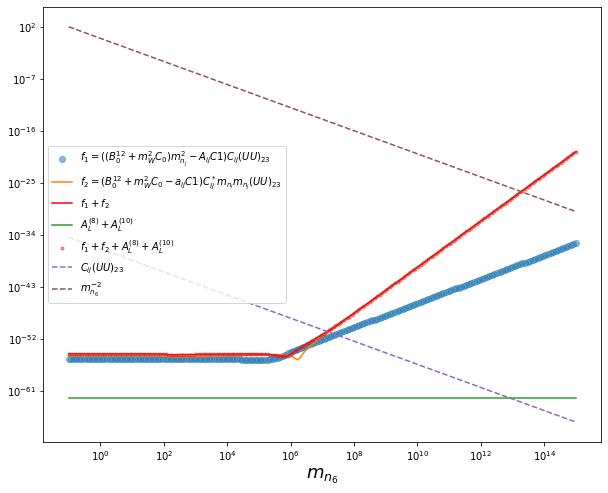

In [59]:
plt.figure(figsize=(10,8))
######################33
plt.loglog(np.real(m6np),abs(TermAL_mnl2np*fac)**2,'o',
label='$f_1 = ((B^{12}_0 + m_W^2 C_0)m_{n_j}^2 - A_{ij} C1 )C_{ij}(UU)_{23}$',alpha=0.5)
########################
plt.loglog(np.real(m6np),abs(TermAL_mnkmnlnp*fac)**2,
label='$f_2 = (B^{12}_0 + m_W^2 C_0 - a_{ij} C1 )C^*_{ij}m_{n_i} m_{n_j}(UU)_{23}$')

plt.loglog(np.real(m6np),abs((TermAL_mnl2np + TermAL_mnkmnlnp)*fac)**2,'-r',
label='$f_1 + f_2$')

plt.loglog(np.real(m6np),abs(( AL8+AL10)*fac)**2,label='$A_L^{(8)} + A_L^{(10)}$')
plt.loglog(np.real(m6np),abs((TermAL_mnl2np + TermAL_mnkmnlnp + AL8 + AL10)*fac)**2,'.',
label='$f_1 + f_2 +A_L^{(8)} + A_L^{(10)}$',alpha=0.5)

#####
plt.loglog(np.real(m6np),abs(UUCklcnp),'--',label='$C_{ij} (UU)_{23}$')
plt.loglog(np.real(m6np),abs(1.0/m6np**2),'--',label='$m_{n_6}^{-2}$')
######


plt.xlabel('$m_{n_6}$',fontsize=18)

plt.legend()

In [31]:
from scipy.optimize import curve_fit

In [53]:
n = 200
expmp = linspace(-1,15,n)
m6np = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [54]:
x = m6np
y = abs(UUCklcnp)
def curve(x,a):
    return a/x**2# + b

a,b = curve_fit(curve,x,y)

In [55]:
a,b

(array([3.54933932e-37]), array([[1.90591123e-94]]))

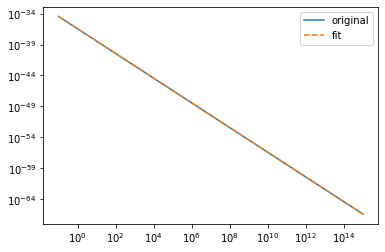

In [58]:
y_line = curve(x,a)
plt.loglog(x,y,label='original')
plt.loglog(x,y_line,'--',label=r'$3.55\times10^{-35}m_{n_6}^2$')
plt.legend()
